Dataset retrieved from: https://zenodo.org/record/1188976

## Import/Install Necessary Modules and Packages

In [ ]:
pip install numpy==1.21.0

In [ ]:
pip install opendatasets

In [ ]:
pip install tqdm

In [ ]:
pip install matplotlib

In [ ]:
pip install librosa

In [ ]:
pip install fastai

In [ ]:
pip install sounddevice

In [1]:
# Import the `tqdm` module for progress bars.
from tqdm import tqdm

# Import the `matplotlib.pyplot` module for plotting.
import matplotlib.pyplot as plt

# Import the `pathlib` module for working with paths.
import pathlib

# Import the `librosa` module for audio analysis.
import librosa                    
import librosa.display            

# Import the `os` module for working with the operating system.
import os                         

# Import the `scipy.io.wavfile` module for reading and writing WAV files.
import scipy.io.wavfile           
from scipy.io.wavfile import write

# Import the `numpy` module for scientific computing.
import numpy as np                

# Import the `fastai` module for deep learning.
import fastai                     

# Import the `glob` module for finding files.
import glob                       

# Import the `sounddevice` module for recording audio.
import sounddevice as sd

# Import the `PIL` module for image processing.
import PIL

# Import the `tensorflow` module for deep learning.
import tensorflow as tf

# Import the `keras` module from `tensorflow` for deep learning.
from tensorflow import keras

# Import the `layers` module from `keras` for deep learning.
from tensorflow.keras import layers

# Import the `Sequential` module from `keras` for deep learning.
from tensorflow.keras.models import Sequential

# Import the `confusion_matrix` module from `sklearn.metrics` for evaluating models.
from sklearn.metrics import confusion_matrix

# Import the `seaborn` module for plotting.
import seaborn as sns

# Import fast AI stuff
# from fastai import *                                 
# from fastai.vision.all import *
# from fastai.vision.data import ImageDataLoaders
# from fastai.tabular.all import *
# from fastai.text.all import *
# from fastai.vision.widgets import *

2023-05-31 11:26:49.560295: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# DOWNLOAD DATASET

In [21]:
# RAVDESS Emotional Speed audio Dataset
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio")
# use kaggle credentials

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moiezqamar
Your Kaggle Key: ········


100%|████████████████████████████████████████| 429M/429M [00:44<00:00, 10.0MB/s]


In [22]:
# RAVDESS Emotional Song audio Dataset
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-song-audio")
# use kaggle credentials

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: moiezqamar
Your Kaggle Key: ········


100%|████████████████████████████████████████| 456M/456M [00:46<00:00, 10.4MB/s]


In [36]:
# CREMA-D Dataset
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ejlok1/cremad")
# use kaggle credentials
# information about this dataset: https://github.com/CheyneyComputerScience/CREMA-D

Skipping, found downloaded files in "./cremad" (use force=True to force download)


In [2]:
# Dictionary of Emotions (will be used later on)
emotion_map = {
    '01' : 'neutral', 
    '02' : 'calm', 
    '03' : 'happy', 
    '04' : 'sad', 
    '05' : 'angry', 
    '06' : 'fearful', 
    '07' : 'disgust', 
    '08' : 'surprised',
    'NEU': '01',
    'HAP': '03',
    'SAD': '04',
    'ANG': '05',
    'FEA': '06',
    'DIS': '07'
}

# CREATE NEEDED DIRECTORIES

In [23]:
!rm -r "./ravdess-emotional-speech-audio/audio_speech_actors_01-24"
!rm -r "./ravdess-emotional-song-audio/audio_song_actors_01-24"


!mkdir './output'
!mkdir './output/live_images'

!mkdir './Categorical_Dataset'          
!mkdir './Categorical_Dataset/positive' # happy, surprised, neutral, calm
!mkdir './Categorical_Dataset/negative' # angry, sad, disgusted, fearful
# !mkdir './Categorical_Dataset/neutral' 

# !mkdir './DATASET'
# !mkdir './DATASET/angry'
# !mkdir './DATASET/calm'
# !mkdir './DATASET/disgust'
# !mkdir './DATASET/fearful'
# !mkdir './DATASET/neutral'
# !mkdir './DATASET/sad'
# !mkdir './DATASET/happy'
# !mkdir './DATASET/surprised'

!mkdir './models'

mkdir: ./output: File exists
mkdir: ./output/live_images: File exists
mkdir: ./models: File exists


# DEFINING THE PATHS

In [3]:
# Define the paths to the three audio folders
AUDIO_FOLDER1 = "./ravdess-emotional-speech-audio/*"
AUDIO_FOLDER2 = "./ravdess-emotional-song-audio/*"
AUDIO_FOLDER3 = "./cremad/*"

# Define the path to the output dataset folder
DATASET = "./Categorical_Dataset/"

# Get a list of all the audio files in the three folders
paths = [audioFile for actor in glob.glob(AUDIO_FOLDER1) for audioFile in glob.glob(actor +'/*')] + [audioFile for actor in glob.glob(AUDIO_FOLDER2) for audioFile in glob.glob(actor +'/*')] + [audioFile for actor in glob.glob(AUDIO_FOLDER3) for audioFile in glob.glob(actor +'/*')]

# Split the list of audio files into groups of 51 files
result = [paths[i:i+51] for i in range(0, len(paths), 51)]

In [59]:
# Number of audio files
print("Number of audio files:",len(paths))

# Number of groups of 51 audio files
print("Number of groups of 51 audio files:",len(result))

Number of audio files: 9894
Number of groups of 51 audio files: 194


# RUN THIS CODE TO CLEAR THE DATASET FOLDER:

In [64]:
# This code will delete all the files in the specified directory.


directories = [DATASET] # Define the list of directories to delete.

# Iterate over the directories.
for directory in directories:
    foldernames = os.listdir(directory) # Get a list of all the folders in the directory.

    # Iterate over the folders.
    for foldername in foldernames:
        folderpath = os.path.join(directory, foldername) # Get the path to the folder.
        if os.path.isdir(folderpath):                    # Check if the folder is a directory.
            filenames = os.listdir(folderpath)           # Get a list of all the files in the folder.

            # Iterate over the files.
            for filename in filenames:
                filepath = os.path.join(folderpath, filename) # Get the path to the file.
                if os.path.isfile(filepath):                  # Check if the file is a file.
                    os.remove(filepath)                       # Delete the file.

# CONVERT ALL AUDIO FILES TO MELSPECTROGRAM:

In [96]:
def convert_audio_to_melspectrogram(audioPath, savePath):
    """
    Args:
        audioPath (str): The path to the audio file.
        savePath (str): The path to the output file.
    """
    
    # Load audio file and visualize its waveform (using librosa)
    # The `librosa.load()` function takes two arguments: the path to the audio file and the sample rate.
    # The sample rate is the number of samples per second in the audio file.
    x, sr = librosa.load(audioPath, sr=44100)

    # Trim the audio file to remove silence at the beginning and end.
    # The `librosa.effects.trim()` function takes two arguments: the audio signal and the threshold.
    # The threshold is the minimum amplitude that is considered to be non-silence.
    xt,_=librosa.effects.trim(x)                         

    x=xt

    # Plot the spectrogram.
    # The `librosa.stft()` function computes the short-time Fourier transform of the audio signal.
    # The `librosa.amplitude_to_db()` function converts the amplitude of the spectrogram to decibels.
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))

    # Apply log transformation on the loaded audio signals
    # The `librosa.display.specshow()` function plots the spectrogram.
    # The `sr` argument specifies the sample rate of the audio signal.
    # The `x_axis` argument specifies the axis along which the time is displayed.
    # The `y_axis` argument specifies the axis along which the frequency is displayed.
    librosa.display.specshow(Xdb, sr=sr, vmin=-60, vmax=60,x_axis='time', y_axis='log',cmap='magma', ax=None)

    # Remove the axis
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    
    # Save the figure.
    # The `plt.savefig()` function saves the figure to a file.
    # The `savePath` argument specifies the path to the file.
    plt.savefig(savePath)
    plt.clf()

In [97]:
# convert_audio_to_melspectrogram(result[0][0],"./output/sup")
# convert_audio_to_melspectrogram(result[0][1],"./output/sup")
# convert_audio_to_melspectrogram(result[0][2],"./output/sup")

In [98]:
# Convert the audio files to melspectrograms.

# Create a dictionary to count the number of melspectrograms for each emotion.
counts = {}
fileLoc=1
# Iterate over the paths to the audio files.
for path in result:
    files = tqdm(path)
    
    # Iterate over the audio files in the path.
    for audio_file_path in files:
        em = audio_file_path[-18:-16]    # Get the emotion numeric key of the audio file.

        emotion = ''
        
        # If the emotion key is in the known numeric keys, assign the correct emotion category.
        if em in ('01','02','03','08'):
            emotion = 'positive'
        elif em in ('04','05','06','07'):
            emotion = 'negative'
            

        # Otherwise, get the emotion from the emotion map.
        else:
            second_underscore = audio_file_path.find('_', audio_file_path.find('_') + 1)
            em = emotion_map[audio_file_path[second_underscore+1:second_underscore+4]]
            if em in ('01','02','03','08'):
                emotion = 'positive'
            elif em in ('04','05','06','07'):
                emotion = 'negative'

        # Get the count of melspectrograms for the emotion category.
        count = counts.get(emotion, 1)

        # Create the path to the output melspectrogram.
        p = os.path.join(f"{DATASET}{emotion}", f"{emotion}{str(count).zfill(6)}_{dicts[em]}.jpg")        

        # Update the count of melspectrograms for the emotion.
        counts[emotion] = count + 1

        # Convert the audio file to a melspectrogram and save it to the output path.
        convert_audio_to_melspectrogram(audio_file_path, p)
    fileLoc+=1

100%|█████████████████████████████████| 51/51 [00:14<00:00,  3.64it/s, 194/194 ]


<Figure size 640x480 with 0 Axes>

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fs=44100
seconds=3
dtype = 'int16'
mic = int(input(f'Of the following list of devices, select which one to use as your microphone:\n{sd.query_devices()}\n>>>'))
count = 1

while true:
    
    print("Recording...")
    
    checkEmotion(count,mic, fs, seconds, dtype)
    
    cont = input("\nContinue? (Y/N): ")
    
    if cont == 'Y' or cont == 'y':
        count+=1
        continue
    else:
        break

In [4]:
# Define the path to the dataset directory.
data_dir = pathlib.Path('./Categorical_Dataset').with_suffix('')

In [5]:
# Print the path to the dataset directory.
data_dir

PosixPath('Categorical_Dataset')

In [6]:
# Get the number of images in the dataset.
image_count = len(list(data_dir.glob('*/*.jpg')))

# Print the number of images in the dataset.
print(image_count)

9894


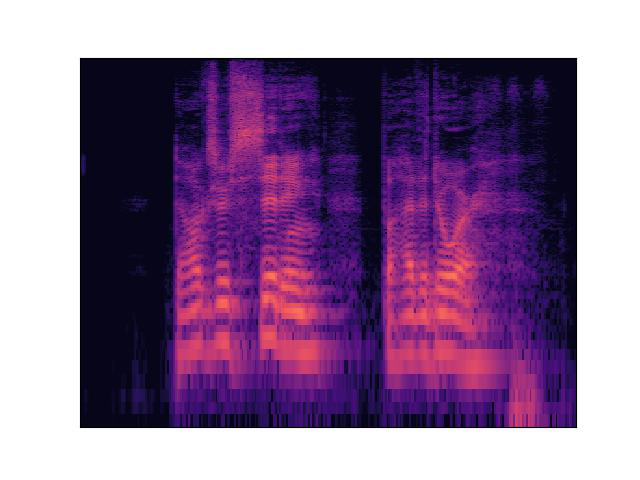

In [10]:
# Printing Outputs to view them

# positive = list(data_dir.glob('positive/*'))
# PIL.Image.open(str(positive[0]))
# PIL.Image.open(str(positive[1]))

# negative = list(data_dir.glob('negative/*'))
# PIL.Image.open(str(negative[0]))
# PIL.Image.open(str(negative[1]))

In [11]:
# Define the batch size.
batch_size = 32

# Define the image height and width.
img_height = 240
img_width = 320

In [12]:
# Create the training dataset.
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,                             # The path to the dataset directory.
    validation_split=0.2,                 # The fraction of the dataset to use for validation.
    subset="training",                    # The subset of the dataset to use for training.
    seed=123,                             # The random seed to use for shuffling the dataset.
    image_size=(img_height, img_width),   # The size of the images to resize to.
    batch_size=batch_size)                # The batch size.

Found 9894 files belonging to 3 classes.
Using 7916 files for training.


In [13]:
# Create the validation dataset.
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,                             # The path to the dataset directory.
    validation_split=0.2,                 # The fraction of the dataset to use for validation.
    subset="validation",                  # The subset of the dataset to use for validation.
    seed=123,                             # The random seed to use for shuffling the dataset.
    image_size=(img_height, img_width),   # The size of the images to resize to.
    batch_size=batch_size)                # The batch size.

Found 9894 files belonging to 3 classes.
Using 1978 files for validation.


In [14]:
# Get the class names from the training dataset.
class_names = train_ds.class_names

# Print the class names.
print(class_names)

['negative', 'neutral', 'positive']


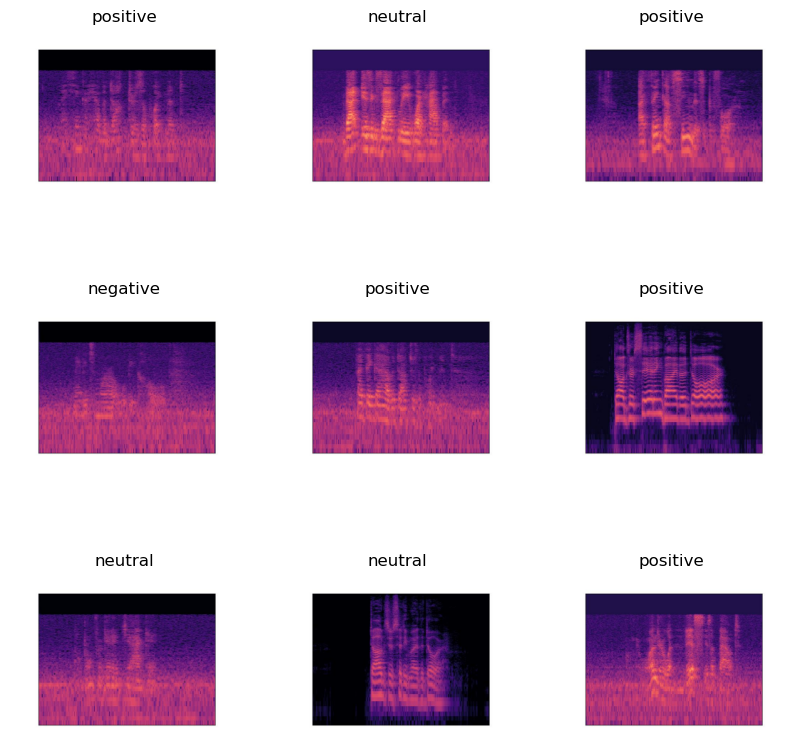

In [15]:
# Create a figure with a size of 10x10.
plt.figure(figsize=(10, 10))

# Iterate over the first 9 images and labels in the training dataset.
for images, labels in train_ds.take(1):

    # For each image, plot the image with the title of the corresponding label.
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
# Get the shape of the first image batch and the first label batch.
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 240, 320, 3)
(32,)


In [17]:
# Define the `AUTOTUNE` constant.
AUTOTUNE = tf.data.AUTOTUNE

# Cache the training dataset, shuffle it, and prefetch it.
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Cache the validation dataset and prefetch it.
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
# Create a normalization layer that scales the pixel values from 0 to 1.
normalization_layer = layers.Rescaling(1./255)

In [19]:
# Map the normalization layer over the training dataset.
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# Get the first image batch and label batch from the normalized dataset.
image_batch, labels_batch = next(iter(normalized_ds))

# Get the minimum and maximum pixel values of the first image.
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [20]:
# Get the number of classes.
num_classes = len(class_names)

# Create a sequential model.
model = Sequential([

    # Rescale the pixel values from 0 to 1.
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    # Create a convolutional layer with 16 filters of size 3x3.
    layers.Conv2D(16, 3, padding='same', activation='relu'),

    # Create a max pooling layer with a pool size of 2x2.
    layers.MaxPooling2D(),
    
    # Create another convolutional layer with 32 filters of size 3x3.
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    
    # Create another max pooling layer with a pool size of 2x2.
    layers.MaxPooling2D(),
    
    # Create another convolutional layer with 64 filters of size 3x3.
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    
    # Create another max pooling layer with a pool size of 2x2.
    layers.MaxPooling2D(),
    
    # Flatten the output of the convolutional layers.
    layers.Flatten(),

    # Create a dense layer with 128 neurons and ReLU activation.
    layers.Dense(128, activation='relu'),
    
    # Create a dense layer with `num_classes` neurons and softmax activation.
    layers.Dense(num_classes)
])

In [21]:
# Compile the model using Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# Summarize the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 240, 320, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 160, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 80, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 80, 64)        1

In [23]:
# Train the model for 10 epochs.
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
248/248 [==============================] - 246s 987ms/step - loss: 1.1169 - accuracy: 0.5192 - val_loss: 0.9916 - val_accuracy: 0.5283
Epoch 2/10
248/248 [==============================] - 236s 949ms/step - loss: 0.9742 - accuracy: 0.5459 - val_loss: 0.9242 - val_accuracy: 0.5834
Epoch 3/10
248/248 [==============================] - 210s 846ms/step - loss: 0.8559 - accuracy: 0.6137 - val_loss: 0.7476 - val_accuracy: 0.7002
Epoch 4/10
248/248 [==============================] - 209s 844ms/step - loss: 0.6503 - accuracy: 0.7312 - val_loss: 0.6376 - val_accuracy: 0.7548
Epoch 5/10
248/248 [==============================] - 238s 958ms/step - loss: 0.5573 - accuracy: 0.7764 - val_loss: 0.5463 - val_accuracy: 0.7872
Epoch 6/10
248/248 [==============================] - 224s 903ms/step - loss: 0.4855 - accuracy: 0.8089 - val_loss: 0.5369 - val_accuracy: 0.7897
Epoch 7/10
248/248 [==============================] - 242s 977ms/step - loss: 0.4236 - accuracy: 0.8325 - val_loss: 0.5521 -

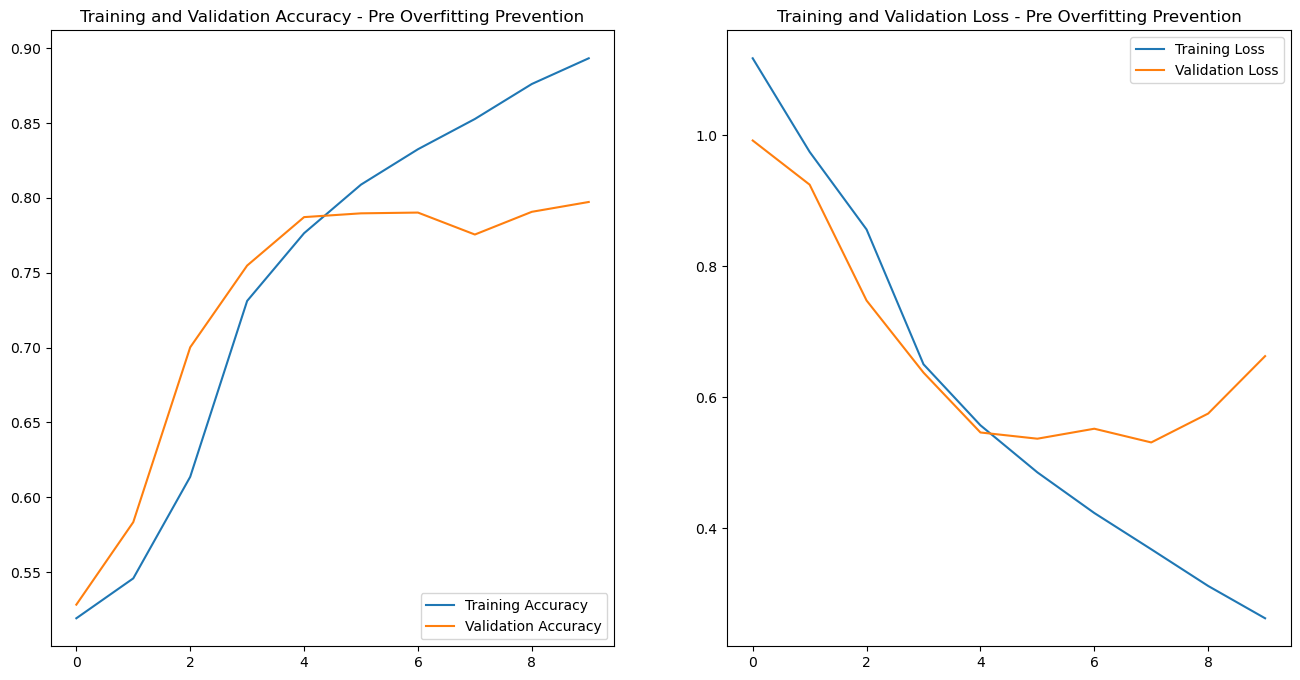

In [25]:
# Get the training and validation accuracy from the history object.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss from the history object.
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the range of epochs.
epochs_range = range(epochs)

# Create a figure with a size of 16x8.
plt.figure(figsize=(16, 8))

# Create the first subplot.
plt.subplot(1, 2, 1)

# Plot the training and validation accuracy.
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

# Add a legend.
plt.legend(loc='lower right')

# Add a title.
plt.title('Training and Validation Accuracy - Pre Overfitting Prevention')

# Create the second subplot.
plt.subplot(1, 2, 2)

# Plot the training and validation loss.
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

# Add a legend.
plt.legend(loc='upper right')

# Add a title.
plt.title('Training and Validation Loss - Pre Overfitting Prevention')

# Show the figure.
plt.show()

248/248 [==============================] - 87s 350ms/step


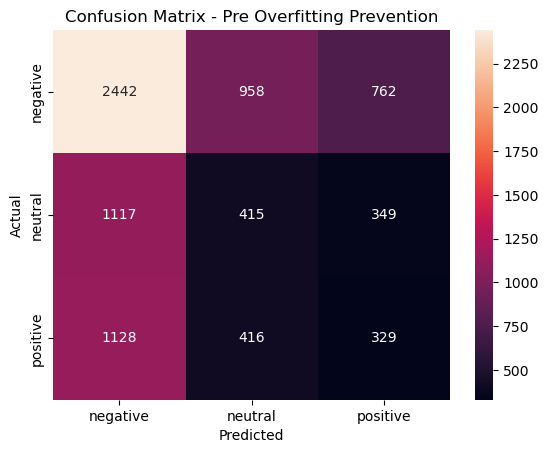

In [28]:
# Confusion Matrix of the Training Process

predictions = model.predict(train_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = []
for images, labels in train_ds:
    true_labels.extend(labels.numpy())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Pre Overfitting Prevention")
plt.show()

62/62 [==============================] - 21s 332ms/step


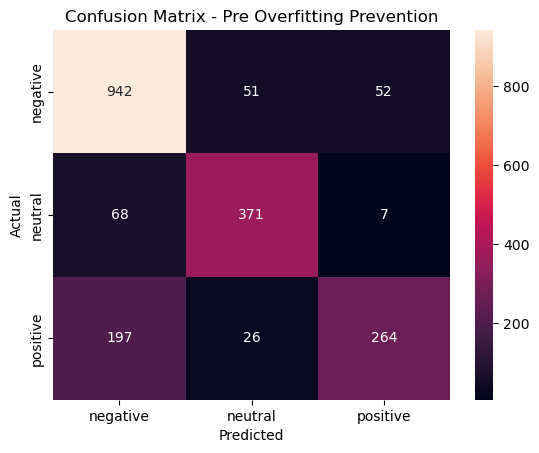

In [27]:
# Confusing matrix of the validation process

predictions = model.predict(val_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Pre Overfitting Prevention")
plt.show()

In [53]:
# Import the warnings module.
import warnings

# Filter out all warnings.
warnings.filterwarnings('ignore')

# Use data augmentation to prevent overfitting.

# Fight overfitting by using data augmentation - Creating a data augmentation object.
data_augmentation = keras.Sequential(
    [
        # Randomly flip the image horizontally.
        layers.RandomFlip("horizontal",input_shape=(img_height, img_width,3)),
        
        # Randomly rotate the image by up to 10 degrees.
        layers.RandomRotation(0.1),
        
        # Randomly zoom the image by up to 10%.
        layers.RandomZoom(0.1),
        
        # Add Gaussian noise to the image.
        layers.GaussianNoise(0.1),
    ]
)

#-->Other data augmentation techniques:
#   layers.RandomCrop(height=img_height, width=img_width),
#   layers.RandomBrightness(0.2),
#   layers.RandomContrast(0.2),


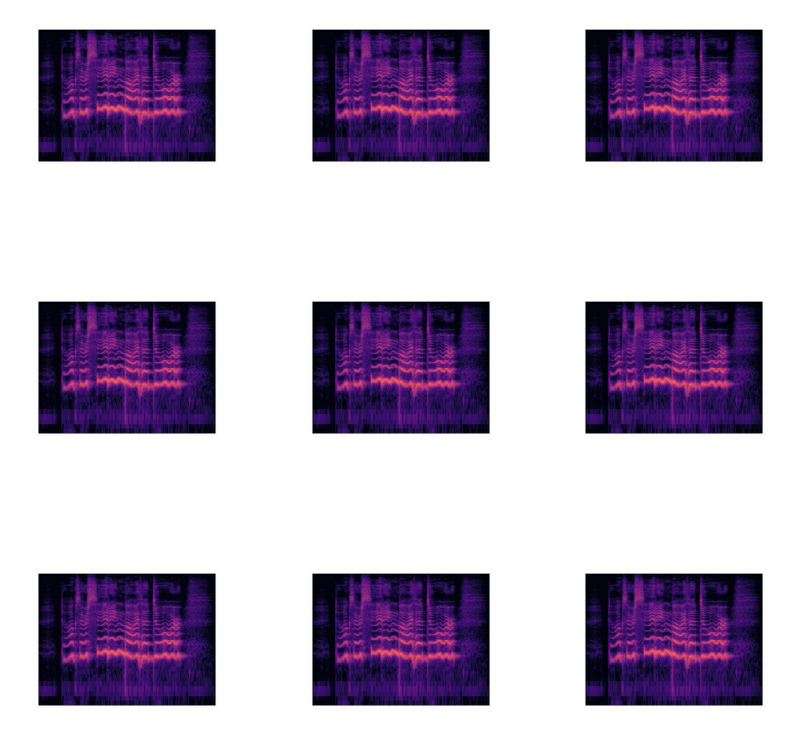

In [54]:
# Create a figure with a size of 10x10.
plt.figure(figsize=(10, 10))

# Iterate over the first 9 images in the training dataset.
for images, _ in train_ds.take(1):
    for i in range(9):
        # Apply data augmentation to the image.
        augmented_images = data_augmentation(images)
        
        # Plot the augmented image.
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [55]:
# Utilizing Dropout
model2 = Sequential(
    [

        # Apply data augmentation to the input images.
        data_augmentation,

        # Rescale the pixel values from 0 to 1.
        layers.Rescaling(1./255),

        # Create a convolutional layer with 16 filters of size 3x3.
        layers.Conv2D(16, 3, padding='same', activation='relu'),

        # Create a max pooling layer with a pool size of 2x2.
        layers.MaxPooling2D(),

        # Create another convolutional layer with 32 filters of size 3x3.
        layers.Conv2D(32, 3, padding='same', activation='relu'),

        # Create another max pooling layer with a pool size of 2x2.
        layers.MaxPooling2D(),

        # Create another convolutional layer with 64 filters of size 3x3.
        layers.Conv2D(64, 3, padding='same', activation='relu'),

        # Create another max pooling layer with a pool size of 2x2.
        layers.MaxPooling2D(),

        # Dropout layer with a rate of 0.2.
        layers.Dropout(0.2),

        # Flatten the output of the convolutional layers.
        layers.Flatten(),

        # Create a dense layer with 128 neurons and ReLU activation.
        layers.Dense(128, activation='relu'),

        # Create a dense layer with `num_classes` neurons and softmax activation.
        layers.Dense(num_classes, name="outputs")
    ]
)

In [56]:
# Compile the model using Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [57]:
# Summarize the model.
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (None, 240, 320, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 240, 320, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 240, 320, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 160, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 120, 160, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 60, 80, 32)       0         
 2D)                                                 

In [58]:
# Train the model for 15 epochs.
epochs = 15
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


248/248 [==============================] - 356s 1s/step - loss: 1.0796 - accuracy: 0.5230 - val_loss: 1.0100 - val_accuracy: 0.5329
Epoch 2/15
248/248 [==============================] - 336s 1s/step - loss: 1.0087 - accuracy: 0.5302 - val_loss: 1.0109 - val_accuracy: 0.5369
Epoch 3/15
248/248 [==============================] - 337s 1s/step - loss: 0.9977 - accuracy: 0.5302 - val_loss: 0.9654 - val_accuracy: 0.5339
Epoch 4/15
248/248 [==============================] - 328s 1s/step - loss: 0.9663 - accuracy: 0.5317 - val_loss: 0.9297 - val_accuracy: 0.5794
Epoch 5/15
248/248 [==============================] - 358s 1s/step - loss: 0.9423 - accuracy: 0.5637 - val_loss: 0.9132 - val_accuracy: 0.5895
Epoch 6/15
248/248 [==============================] - 360s 1s/step - loss: 0.9167 - accuracy: 0.5705 - val_loss: 0.8907 - val_accuracy: 0.5779
Epoch 7/15
248/248 [==============================] - 380s 2s/step - loss: 0.8943 - accuracy: 0.5781 - val_loss: 0.9003 - val_accuracy: 0.5743
Epoch 8/15

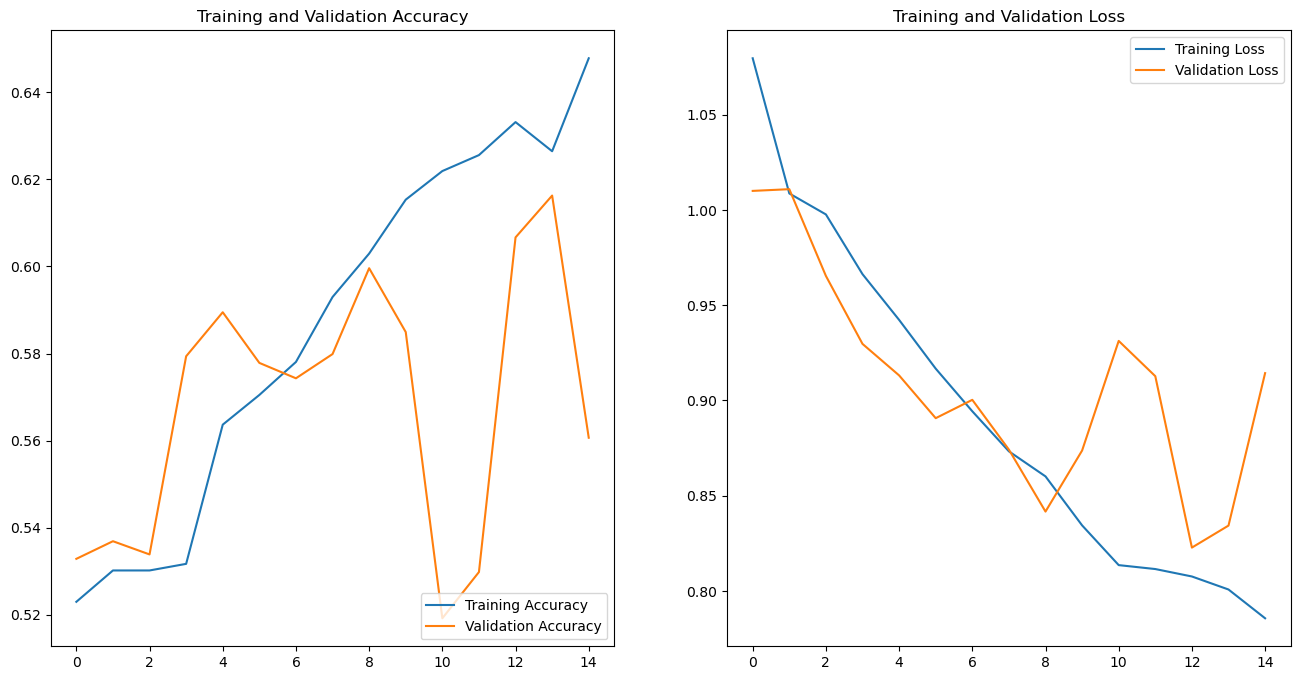

In [60]:
# Get the training and validation accuracy from the history object.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss from the history object.
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the range of epochs.
epochs_range = range(epochs)

# Create a figure with a size of 16x8.
plt.figure(figsize=(16, 8))

# Create the first subplot.
plt.subplot(1, 2, 1)

# Plot the training and validation accuracy.
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

# Add a legend.
plt.legend(loc='lower right')

# Add a title.
plt.title('Training and Validation Accuracy')

# Create the second subplot.
plt.subplot(1, 2, 2)

# Plot the training and validation loss.
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

# Add a legend.
plt.legend(loc='upper right')

# Add a title.
plt.title('Training and Validation Loss')

# Show the figure.
plt.show()

62/62 [==============================] - 22s 358ms/step


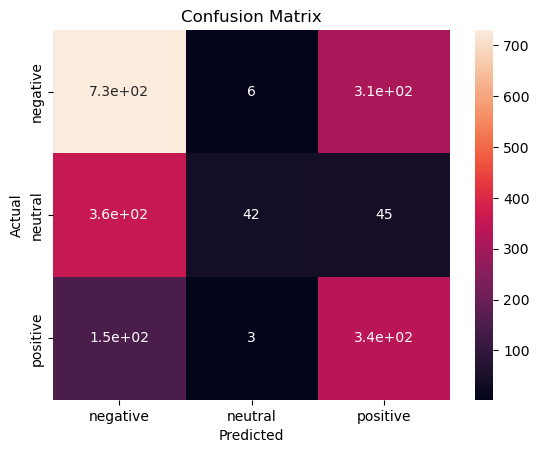

In [61]:
# Get the predictions from the model
predictions = model2.predict(val_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = []
for images, labels in val_ds:
    true_labels.extend(labels.numpy())

# Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

In [62]:
!open .

In [ ]:
# Get the path to the image.
location = './DATASET/angry/angry000001.jpg'

# Load the image.
img = tf.keras.utils.load_img(
   location, target_size=(img_height, img_width)
)

# Convert the image to an array.
img_array = tf.keras.utils.img_to_array(img)

# Create a batch of size 1.
img_array = tf.expand_dims(img_array, 0)

# Get the predictions from the model.
predictions = model2.predict(img_array)

# Get the scores for the predictions.
score = tf.nn.softmax(predictions[0])

# Sort the predictions by score.
sorted_predictions = np.argsort(score)[::-1]

# Take the top 5 predictions.
top_predictions = sorted_predictions[:5]

# Print the top 5 predictions.
for i in range(len(top_predictions)):
    print(
        "The image most likely belongs to {} with a {:.4f} percent confidence."
        .format(class_names[top_predictions[i]], 100 * score[top_predictions[i]])
    )